# Data Preparation

## Load Dataframe

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("avarice02/urinalysis-test-results")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/urinalysis-test-results


In [3]:
import pandas as pd
import os

csv_file = os.path.join(path, "urinalysis_tests.csv")
df = pd.read_csv(csv_file)
display(df)

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.00,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.00,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.00,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,3,77.00,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,4,29.00,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,0.06,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.0,1.015,1-2,0-1,RARE,FEW,NONE SEEN,RARE,NEGATIVE
1432,1432,42.00,MALE,YELLOW,CLEAR,NEGATIVE,NEGATIVE,6.5,1.010,0-2,0-2,RARE,NONE SEEN,NONE SEEN,RARE,NEGATIVE
1433,1433,47.00,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,6.0,1.030,2-4,0-2,MODERATE,MODERATE,NONE SEEN,RARE,NEGATIVE
1434,1434,57.00,FEMALE,DARK YELLOW,CLEAR,NEGATIVE,TRACE,5.0,1.030,0-2,0-2,PLENTY,PLENTY,NONE SEEN,FEW,NEGATIVE


In [4]:
# remove row number
df = df.drop("Unnamed: 0", axis=1)

## Handle Rows With Missing Values

In [5]:
df.isna().sum()

Age                 0
Gender              0
Color               1
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [6]:
# drop rows with NA values
df = df.dropna()
df.isna().sum()

Age                 0
Gender              0
Color               0
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

## Feature Encoding

This study draws upon a dataset containing both ordinal and nominal variables. Variables such as Transparency, Epithelial Cells, Mucous Threads, Amorphous Urates, Bacteria, Color, Glucose, Protein, WBC, and RBC were classified as ordinal because their categories follow a meaningful progression. To ensure that this ordering was preserved during preprocessing, the research design incorporated an algorithm specifically intended to maintain the rank structure of these variables. In contrast, Gender was treated as nominal, since its categories do not imply hierarchy, and was encoded using a One-Hot scheme that represents each category as a binary indicator.

On the other hand, the variables WBC and RBC required a more careful approach. Their recorded values appeared in three distinct forms: ranges (for example “0–1,” “1–3,” “2–4”), threshold expressions using the greater-than symbol (such as “>50” or “>100”), and qualitative descriptors including “LOADED” and “TNTC” (too numerous to count), which denote extreme values. Together, these two features produced 91 unique entries. A straightforward ordinal transformation of all categories would have resulted in an unwieldy, high-dimensional representation. To address this, the researchers first established a unified ordering scheme that could accommodate ranges, thresholds, and qualitative labels. An algorithm was then implemented to assign ranks and sort the values accordingly, thereby preserving the ordinal character of WBC and RBC while avoiding dimensional expansion

When a data entry is expressed with a greater-than symbol (for instance “>50” or “>100”), the algorithm interprets the value by discarding the symbol and retaining only the numeric component. Thus, the entry “>100” is assigned the value 100. For entries represented by qualitative strings such as “LOADED” or “TNTC” (too numerous to count), the algorithm designates the maximum floating-point number available in NumPy, 1.7976931348623157e+308, in order to preserve their status as the highest values within the dataset.

After consolidating all WBC and RBC data points into a unified list and eliminating duplicates, the researchers applied a custom sorting procedure. This procedure assigns a numerical representation to each entry depending on its format: ranges, threshold values, or qualitative strings. For ranges, the assigned value corresponds to the midpoint, which is computed using a specific formula. In this way, the algorithm ensures that heterogeneous data formats are consistently ordered while maintaining their relative magnitude

For entries expressed with a greater-than symbol, such as “>50” or “>100,” the algorithm interprets the value by discarding the symbol and retaining only the numeric component. Thus, “>100” is encoded as 100. In the case of qualitative descriptors like “LOADED” or “TNTC” (too numerous to count), the algorithm substitutes a fixed value of 250. This choice is consistent with common substitution practices, where TNTC is often replaced by the highest valid count observed in laboratory methods (for example, 200 or 300 in spread plate assays, depending on the microorganism). The assignment of 250 ensures that both TNTC and LOADED remain positioned at the upper end of the ordinal scale during encoding, thereby preserving their intended rank relative to other values.

After the list was ordered using the custom algorithm, the researchers applied a binning strategy designed to simplify representation, reduce feature cardinality, and retain meaningful information. The sorted list contained 91 distinct values, which were partitioned into 13 groups. Each group, or “bin,” consisted of seven data points, producing a two-dimensional nested structure. This nested arrangement then served as the reference framework for encoding WBC and RBC values as integers while preserving their ordinal properties. The transformation process involved identifying the bin in which a given data point was located and assigning the corresponding index of that bin. For instance, a range value such as “1–4” was placed in the second bin, where its assigned index was 1, and its transformed representation became 1, consistent with the bin’s index.

In [7]:
import pandas
import numpy as np
from typing import Union

def custom_sort(value: str) -> Union[int, float]:
    APPROXIMATE_COUNT = 250
    
    if value.__contains__(">"):
        return int(value.replace(">", ""))
    elif value.isalpha():
        return APPROXIMATE_COUNT
    else:
        start, end = map(int, value.split('-'))
        return start + (end - start) / 2

def encode_features(
        dataframe_: pandas.core.frame.DataFrame, 
        ordinal_features: Union[list, tuple, set], 
        nominal_features: Union[list, tuple, set]
    ) -> pandas.core.frame.DataFrame:
    
    MAPPING_REFERENCE = {"ABSENCE_REFERENCE": {"NONE SEEN":0, 
                                               "RARE":1,
                                               "FEW":2,
                                               "OCCASIONAL":3,
                                               "MODERATE":4,
                                               "LOADED":5,
                                               "PLENTY":6},
                        
                        "Color": {"LIGHT YELLOW":0,
                                  "STRAW":1,
                                  "AMBER":2,
                                  "BROWN":3,
                                  "DARK YELLOW":4,
                                  "YELLOW":5,
                                  "REDDISH YELLOW":6,
                                  "REDDISH":7,
                                  "LIGHT RED":8,
                                  "RED":9},
                         
                        "Transparency": {"CLEAR":0,
                                         "SLIGHTLY HAZY":1,
                                         "HAZY":2,
                                         "CLOUDY":3,
                                         "TURBID":4},

                        "Protein_and_Glucose": {"NEGATIVE":0,
                                                "TRACE":1,
                                                "1+":2,
                                                "2+":3,
                                                "3+":4,
                                                "4+":5}}
    
    SORTED_RANGE_VALUES = np.array(sorted(set(dataframe_["RBC"]) | set(dataframe_["WBC"]), key=custom_sort))
    
    for ordinal in ordinal_features:
        if ordinal in ["Epithelial Cells", "Mucous Threads", "Amorphous Urates", "Bacteria"]:
            dataframe_[ordinal] = dataframe_[ordinal].map(MAPPING_REFERENCE["ABSENCE_REFERENCE"])

        elif ordinal in ["Protein", "Glucose"]:
            dataframe_[ordinal] = dataframe_[ordinal].map(MAPPING_REFERENCE["Protein_and_Glucose"])

        elif ordinal in ["WBC", "RBC"]:
            NUM_OF_SPLITS = 13
            SPLITTED_ARRAY = np.hsplit(np.array(SORTED_RANGE_VALUES), NUM_OF_SPLITS)

            LIST_OF_BIN = [*SPLITTED_ARRAY]

            def mapping_function(value: str) -> int:
                MAP_ = {tuple(bin_):idx for idx, bin_ in enumerate(LIST_OF_BIN)}

                for key, reference in MAP_.items():
                    if value in key:
                        return reference

            dataframe_[ordinal] = dataframe_[ordinal].map(mapping_function)
        else:
            dataframe_[ordinal] = dataframe_[ordinal].map(MAPPING_REFERENCE[ordinal])
            
    for nominal in nominal_features:
        dataframe_ = pd.concat([dataframe_, pd.get_dummies(dataframe_[nominal])["FEMALE"]], axis=1).drop(nominal, axis=1)
        
    return dataframe_

encoded_df = encode_features(df, 
                    ordinal_features=["Transparency", 
                                      "Epithelial Cells", 
                                      "Mucous Threads", 
                                      "Amorphous Urates", 
                                      "Bacteria",
                                      "Color",
                                      "Protein",
                                      "Glucose",
                                      "WBC",
                                      "RBC"],

                    nominal_features=["Gender"])

encoded_df

,Age,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis,FEMALE
0,76.00,0,0,0,0,5.0,1.010,0,0,3,1,0,3,NEGATIVE,True
1,9.00,4,1,0,2,5.0,1.030,0,0,1,2,2,4,NEGATIVE,False
2,12.00,0,1,0,1,5.0,1.030,0,0,1,2,4,1,NEGATIVE,False
3,77.00,3,3,0,2,6.0,1.020,3,12,1,1,0,2,NEGATIVE,False
4,29.00,5,2,0,1,6.0,1.025,1,0,1,1,0,2,NEGATIVE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.06,5,0,0,0,6.0,1.015,0,0,1,2,0,1,NEGATIVE,False
1432,42.00,5,0,0,0,6.5,1.010,0,0,1,0,0,1,NEGATIVE,False
1433,47.00,4,0,0,1,6.0,1.030,1,0,4,4,0,1,NEGATIVE,True
1434,57.00,4,0,0,1,5.0,1.030,0,0,6,6,0,2,NEGATIVE,True


## Baseline Performance (Before Resampling)

,0
NEGATIVE,1354
POSITIVE,81


1.35 * Proportion Chance Criterion: 120.61984241644309


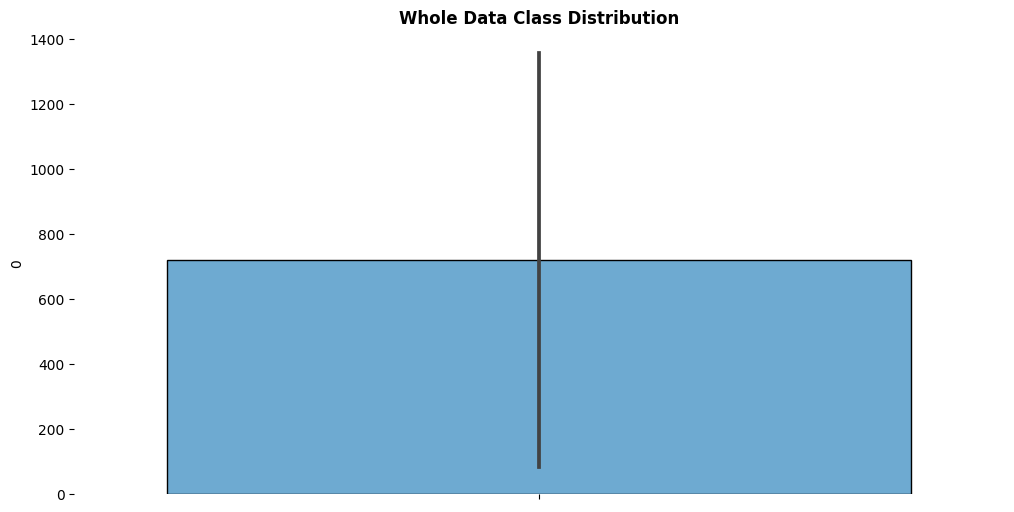

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def performance_baseline(dataframe_: pandas.core.frame.DataFrame, plot_title: str, target_name: str = False, PCC: bool = False, weight: int = 1.35) -> None:
    if not target_name:
        state_counts = Counter(dataframe_)
        df_state = pd.DataFrame.from_dict(state_counts, orient="index")
    else:
        state_counts = Counter(dataframe_[target_name])
        df_state = pd.DataFrame.from_dict(state_counts, orient="index")
    

    _, axs = plt.subplots(figsize=(12, 6))

    for spine in ["top", "bottom", "left", "right"]:
        axs.spines[spine].set_visible(False)

    sns.barplot(hue=df_state.index, y=df_state[0], palette = ["#5DADE2", "#515A5A"], ec="k")
    plt.title(plot_title, fontweight = "bold")

    if PCC:
        NUM = (df_state[0]/df_state[0].sum())**2

        display(df_state)
        print(f"{weight} * Proportion Chance Criterion: {weight*100*NUM.sum()}")

performance_baseline(encoded_df, plot_title="Whole Data Class Distribution", target_name="Diagnosis", PCC = True)

## Data Splitting, Oversampling & Feature Scaling

In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from typing import Tuple, List, Callable, Union
from sklearn.neighbors import NearestNeighbors
import warnings

class SimpleSMOTE:
    def __init__(self, k_neighbors=5, random_state=42):
        self.k_neighbors = k_neighbors
        self.random_state = np.random.RandomState(random_state)

    def fit_resample(self, X, y):
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)

        minority_class = y.value_counts().idxmin()
        majority_class = y.value_counts().idxmax()

        X_min = X[y == minority_class]
        X_maj = X[y == majority_class]

        # number of synthetic samples to generate
        n_samples = len(X_maj) - len(X_min)

        nbrs = NearestNeighbors(n_neighbors=self.k_neighbors)
        nbrs.fit(X_min)

        synthetic_samples = []
        for _ in range(n_samples):
            idx = self.random_state.randint(0, len(X_min))
            row = X_min.iloc[idx]

            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=UserWarning)
                _, neighbors = nbrs.kneighbors([row])
                
            neighbor = X_min.iloc[self.random_state.choice(neighbors[0][1:])]

            diff = neighbor - row
            synthetic = row + self.random_state.rand() * diff
            synthetic_samples.append(synthetic)

        X_syn = pd.DataFrame(synthetic_samples, columns=X.columns)

        X_resampled = pd.concat([X_maj, X_min, X_syn], ignore_index=True)
        y_resampled = pd.concat([
            pd.Series([majority_class] * len(X_maj)),
            pd.Series([minority_class] * len(X_min)),
            pd.Series([minority_class] * len(X_syn))
        ], ignore_index=True)

        return X_resampled, y_resampled

In [10]:
def oversample(X: pd.DataFrame, y: pd.Series):
    SMOTE_MODEL = SimpleSMOTE(random_state=42)
    
    for col in X.columns:
        if X[col].dtype == bool:
            X[col] = X[col].astype(int)

    def smote_wrapper(func):
        def inner(X, y):
            ENCODED_Y = y.map({"NEGATIVE": 0, "POSITIVE": 1})
            return func(X, ENCODED_Y)
        return inner

    ENCODE_AND_OVERSAMPLE = smote_wrapper(SMOTE_MODEL.fit_resample)
    X_resampled, y_resampled = ENCODE_AND_OVERSAMPLE(X, y)

    if "Age" in X_resampled.columns:
        X_resampled = X_resampled.astype({"Age": float})

    return X_resampled, y_resampled

In [11]:
def normalize_splits(
        X: pd.DataFrame, 
        y: pd.Series, 
        test_size_: float, 
        random_state_: int, 
        continuous_features: list, 
        categorical_features: list
    ):

    SCALER_ = MinMaxScaler()

    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
        X,
        y,
        test_size=test_size_,
        random_state=random_state_,
        stratify=y
    )

    # oversample training set
    X_TRAIN_OS, Y_TRAIN_OS = oversample(X_TRAIN, Y_TRAIN)

    # fit scaler only on training continuous features
    SCALER_.fit(X_TRAIN_OS[continuous_features])

    # scale train
    X_train_scaled = SCALER_.transform(X_TRAIN_OS[continuous_features])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_features)
    X_train_scaled = pd.concat(
        [X_train_scaled, X_TRAIN_OS[categorical_features].reset_index(drop=True)],
        axis=1
    )

    # scale test
    X_test_scaled = SCALER_.transform(X_TEST[continuous_features])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_features)
    X_test_scaled = pd.concat(
        [X_test_scaled, X_TEST[categorical_features].reset_index(drop=True)],
        axis=1
    )

    # encode test labels
    Y_TEST_ENCODED = Y_TEST.map({"NEGATIVE": 0, "POSITIVE": 1})

    SCALED_SPLITS = (X_train_scaled, X_test_scaled, Y_TRAIN_OS, Y_TEST_ENCODED)
    return SCALER_, SCALED_SPLITS

In [12]:
X = encoded_df[[
    "Age", "Color", "Transparency", "pH", "Glucose", "Protein",
    "Specific Gravity", "WBC", "RBC", "Epithelial Cells",
    "Mucous Threads", "Amorphous Urates", "Bacteria", "FEMALE"
]]

y = encoded_df["Diagnosis"]

TRAIN_SCALER, SCALED_SPLITS = normalize_splits(
    X, 
    y,
    test_size_=0.3,
    random_state_=42,
    continuous_features=[
        "Age", "Color", "Transparency", "Glucose", "Protein", "pH",
        "Specific Gravity", "WBC", "RBC", "Epithelial Cells",
        "Mucous Threads", "Amorphous Urates", "Bacteria"
    ],
    categorical_features=["FEMALE"]
)

## Baseline Performance (After Resampling)

,0
0,947
1,947


1.35 * Proportion Chance Criterion: 67.5


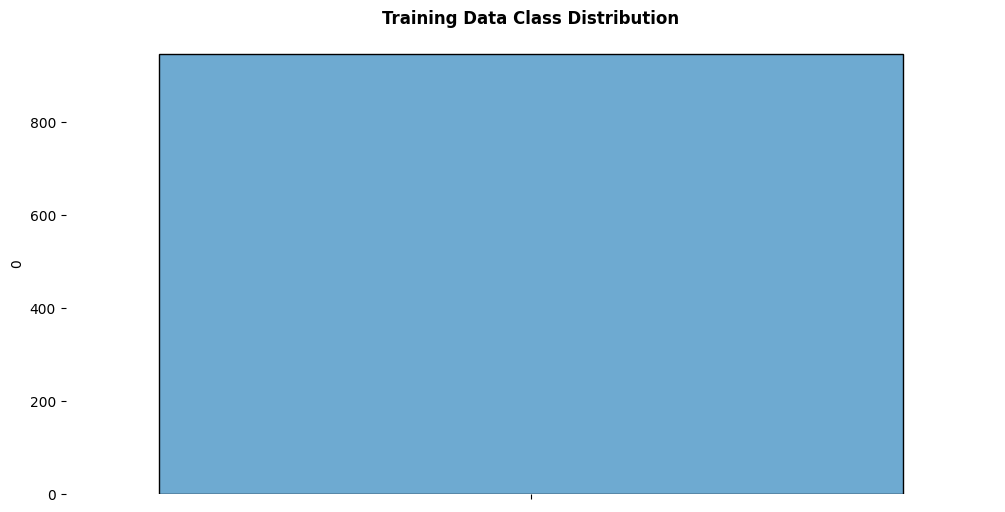

In [13]:
X_TRAIN_SCALED, X_TEST, Y_TRAIN, Y_TEST = SCALED_SPLITS

performance_baseline(Y_TRAIN, plot_title="Training Data Class Distribution", PCC = True)

# Modeling

## Splitting the Train Set for Validation Set

In [14]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_TRAIN_SCALED, 
                                                                    Y_TRAIN, 
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                   stratify = Y_TRAIN)

In [15]:
import optuna

def show_study_summary(study: optuna.study.Study) -> None:
    print("\033[1mBest Hyperparameters")
    pprint(study.best_params)
    print()

    print("\033[1mAccuracy for the Best Hyperparameters")
    print(study.best_value)

    optimization_history_plot = optuna.visualization.plot_optimization_history(study)
    param_importances_plot = optuna.visualization.plot_param_importances(study)
    parallel_coordinate_plot = optuna.visualization.plot_parallel_coordinate(study)

    optimization_history_plot.update_layout({"height": 600})
    param_importances_plot.update_layout({"height": 600})
    parallel_coordinate_plot.update_layout({"height": 600})

    optimization_history_plot.show()
    param_importances_plot.show()
    parallel_coordinate_plot.show()

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, confusion_matrix
optuna.logging.set_verbosity(optuna.logging.ERROR)

def forest_best_hyperparams(trial: optuna.study.Study)-> float:
    PARAMS = {
        "n_estimators": trial.suggest_int('n_estimators', 20, 150),
        "max_depth": trial.suggest_int('max_depth', 10, 30),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None, 2]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    }

    RANDOM_FOREST = RandomForestClassifier(**PARAMS)

    RANDOM_FOREST.fit(X_train_val, y_train_val)

    YHAT = RANDOM_FOREST.predict(X_test_val)

    F1_SCORE_ = f1_score(y_test_val, YHAT)

    return F1_SCORE_

RAND_FOREST_STUDY = optuna.create_study(direction="maximize", study_name="forest_tuning")

RAND_FOREST_STUDY.optimize(forest_best_hyperparams, n_trials=100, n_jobs=-1, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
from pprint import pprint

show_study_summary(RAND_FOREST_STUDY)

Best Hyperparameters
{'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 37}

Accuracy for the Best Hyperparameters
0.9731182795698925


## KNN (K-Nearest Neighbors)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

def knn_best_hyperparams(trial: optuna.study.Study) -> float:
    # Define KNN hyperparameter search space
    PARAMS = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 30),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "metric": trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"]),
        "p": trial.suggest_int("p", 1, 3)  # for minkowski only
    }

    # Create model
    clf = KNeighborsClassifier(
        n_neighbors=PARAMS["n_neighbors"],
        weights=PARAMS["weights"],
        metric=PARAMS["metric"],
        p=PARAMS["p"]
    )
    
    # Train
    clf.fit(X_train_val, y_train_val)

    # Predict
    preds = clf.predict(X_test_val)

    # Return F1 score for Optuna to maximize
    return f1_score(y_test_val, preds)

In [19]:
optuna.logging.set_verbosity(optuna.logging.ERROR)
KNN_STUDY = optuna.create_study(direction="maximize", study_name="KNN_Tuning")
KNN_STUDY.optimize(knn_best_hyperparams, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [20]:
show_study_summary(KNN_STUDY)

Best Hyperparameters
{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Accuracy for the Best Hyperparameters
0.9869451697127937


## MLP (Multi-Layer Perceptron)

In [21]:
import torch
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler

### Load Data

In [22]:
class UTIDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx: int) -> Tuple[Union[torch.Tensor, torch.Tensor]]:
        # Divide the DataFrame into feature set and label set
        x = self.df.iloc[idx, :-1].values.astype("float32").reshape((self.df.columns.__len__() - 1, 1))
        y = self.df.iloc[idx, -1:].values.astype("long").reshape((1, 1))

        # Apply transformations
        if self.transform:
            x = self.transform(x)
            y = self.transform(y)

        return x, y

### Transformation

In [23]:
# Define transformation
TRANSFORMER = transforms.ToTensor()

# Reset indices of the training set
X_TRAIN_SCALED_RESET = X_TRAIN_SCALED.reset_index(drop=True)
Y_TRAIN_RESET = Y_TRAIN.reset_index(drop=True)

# Merge scaled predictors and target into a unified DataFrame
DF = pd.concat([X_TRAIN_SCALED_RESET, Y_TRAIN_RESET], axis=1)

# Initialize UTIDataset using training set and transform
DATA = UTIDataset(DF, TRANSFORMER)

### Data Split

In [24]:
# 80/20 Split
TRAIN_VAL_SPLIT_RATIO = [0.8, 0, 0.2]
TRAIN_SET_TORCH, _, VAL_SET_TORCH = random_split(DATA, TRAIN_VAL_SPLIT_RATIO)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataset.py:473: UserWarning:

Length of split at index 1 is 0. This might result in an empty dataset.



In [25]:
torch.manual_seed(42)
np.random.seed(42)

# Get batch size
BATCH_SIZE = 16

# Get size of the train dataset
DATA_SIZE = len(X_TRAIN_SCALED_RESET)

# Define indices for training and validation sets based on the split ratio
TRAIN_INDICES = list(range(int(DATA_SIZE - (DATA_SIZE * TRAIN_VAL_SPLIT_RATIO[2]))))
VAL_INDICES = list(range(int(DATA_SIZE - (DATA_SIZE * TRAIN_VAL_SPLIT_RATIO[0]))))

# Initialize SubsetRandomSampler for train and validation sets
TRAIN_SAMPLER = SubsetRandomSampler(TRAIN_INDICES)
VAL_SAMPLER = SubsetRandomSampler(VAL_INDICES)

# Initialize DataLoader for train and validation sets
TRAIN_LOADER = DataLoader(TRAIN_SET_TORCH, batch_size=BATCH_SIZE, sampler=TRAIN_SAMPLER)
VAL_LOADER = DataLoader(VAL_SET_TORCH, batch_size=BATCH_SIZE, sampler=VAL_SAMPLER)

### Structure

In [26]:
class ClassifierNN(nn.Module):
    def __init__(self, activation_function):
        super().__init__()

        self.activation_function = activation_function

        # Define fully connected layers
        self.fcn1 = nn.Linear(14, 32)
        self.fcn2 = nn.Linear(32, 64)
        self.fcn3 = nn.Linear(64, 128)
        self.fcn4 = nn.Linear(128, 2)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)

        x = self.activation_function(self.fcn1(x))
        x = self.activation_function(self.fcn2(x))
        x = self.activation_function(self.fcn3(x))

        x = self.fcn4(x)

        return x

In [27]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Optimal Hyperparameters

In [28]:
def tune_NN(trial: optuna.Trial, train_loader_: torch.utils.data.DataLoader, val_loader_: torch.utils.data.DataLoader) -> float:
    global DEVICE

    OPTIMIZERS_ = trial.suggest_categorical("optimizer", ["SGD", "Adam", "RMSprop"])
    ACTIVATION_FUNCTION = trial.suggest_categorical("activation function", [F.relu, F.leaky_relu, F.tanh])
    LEARNING_RATE = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)

    EPOCHS = trial.suggest_int("epochs", 10, 50)

    NN_model = ClassifierNN(ACTIVATION_FUNCTION)

    NN_model = NN_model.to(DEVICE)

    CRITERION = nn.CrossEntropyLoss()
 
    if OPTIMIZERS_ == "SGD":
        optimizer = optim.SGD(NN_model.parameters(), lr=LEARNING_RATE)
    elif OPTIMIZERS_ == "Adam":
        optimizer = optim.Adam(NN_model.parameters(), lr=LEARNING_RATE)
    elif OPTIMIZERS_ == "RMSprop":
        optimizer = optim.RMSprop(NN_model.parameters(), lr=LEARNING_RATE)

    for _ in range(EPOCHS):
        running_loss = 0.0

        for x_train, y_train in train_loader_:
            x_train = x_train.to(DEVICE)
            y_train = y_train.to(DEVICE)

            optimizer.zero_grad()
            OUTPUTS = NN_model(x_train)
            
            y_train = y_train.flatten()

            loss = CRITERION(OUTPUTS, y_train)
            loss.backward()

            optimizer.step()
            running_loss += loss.item()

    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for val_X, val_y in val_loader_:
            val_X = val_X.to(DEVICE)
            val_y = val_y.to(DEVICE)

            OUTPUTS = NN_model(val_X)

            _, YHAT = torch.max(OUTPUTS.data, 1)

            true_labels.extend([arr.flatten()[0] for arr in val_y.cpu().numpy()])
            predicted_labels.extend(YHAT.cpu().numpy())

    F1_SCORE_ = f1_score(true_labels, predicted_labels)

    torch.cuda.empty_cache()

    return F1_SCORE_

In [29]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
optuna.logging.set_verbosity(optuna.logging.ERROR)

MLP_STUDY = optuna.create_study(direction="maximize", study_name="MLP_Tuning")

# Define Parameters
PARAMS = {"train_loader_": TRAIN_LOADER,
          "val_loader_": VAL_LOADER}

MLP_STUDY.optimize(lambda trial: tune_NN(trial, **PARAMS),
                   n_trials=100,
                   n_jobs=-1,
                   show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [30]:
show_study_summary(MLP_STUDY)

Best Hyperparameters
{'activation function': <function leaky_relu at 0x7f2d765bf740>,
 'epochs': 41,
 'learning_rate': 0.0039797529998857875,
 'optimizer': 'Adam'}

Accuracy for the Best Hyperparameters
0.9919999999999999


# Model Evaluation (Non-MLP)

In [31]:
def test_model(
        models: list,
        params: dict,
        X_train: Union[np.array, pandas.core.frame.DataFrame],
        y_train: Union[np.array, pandas.core.frame.DataFrame],
        X_test: Union[np.array, pandas.core.frame.DataFrame],
        y_test: Union[np.array, pandas.core.frame.DataFrame]
    ) -> Tuple[Union[dict, pandas.core.frame.DataFrame]]:

    model_testing_scores = pd.DataFrame()
    models_container = {}

    model_testing_scores["Model"] = []
    model_testing_scores["Accuracy"] = []
    model_testing_scores["Precision"] = []
    model_testing_scores["Recall"] = []
    model_testing_scores["F1-Score"] = []
    model_testing_scores["Specificity"] = []
    model_testing_scores["AUC-ROC"] = []

    for model in tqdm(models):

        MODEL_NAME = model().__class__.__name__
        
        test_model = model(**params[MODEL_NAME])

        test_model.fit(X_train, y_train)

        test_pred = test_model.predict(X_test)

        TN, FP, _, _ = confusion_matrix(y_test, test_pred).ravel()

        TESTING_SPECIFICITY = TN / (TN + FP)

        model_testing_scores = model_testing_scores._append({"Model": MODEL_NAME,
                                                            "Accuracy": accuracy_score(y_test, test_pred),
                                                            "Precision": precision_score(y_test, test_pred),
                                                            "Recall": recall_score(y_test, test_pred),
                                                            "F1-Score": f1_score(y_test, test_pred),
                                                            "Specificity": TESTING_SPECIFICITY,
                                                            "AUC-ROC": roc_auc_score(y_test, test_pred)},
                                                           ignore_index=True)

        models_container[MODEL_NAME] = test_model

    return models_container, model_testing_scores

In [32]:
from tqdm import tqdm

LIST_OF_MODELS = [RandomForestClassifier, KNeighborsClassifier]

MODELS_PARAMETERS = {"KNeighborsClassifier":{'metric': 'manhattan',
                                             'n_neighbors': 4,
                                             'p': 2,
                                             'weights': 'distance'},
                                             
                    "RandomForestClassifier":{'criterion': 'log_loss',
                                             'max_depth': 23,
                                             'max_features': 'log2',
                                             'n_estimators': 39},
                    }

MODEL_CONTAINER, TESTING_SCORES = test_model(LIST_OF_MODELS, MODELS_PARAMETERS, X_TRAIN_SCALED, Y_TRAIN, X_TEST, Y_TEST)

100%|██████████| 2/2 [00:00<00:00,  9.28it/s]


In [33]:
TESTING_SCORES

,Model,Accuracy,Precision,Recall,F1-Score,Specificity,AUC-ROC
0,RandomForestClassifier,0.958237,0.714286,0.416667,0.526316,0.990172,0.703419
1,KNeighborsClassifier,0.914153,0.314286,0.458333,0.372881,0.941032,0.699683


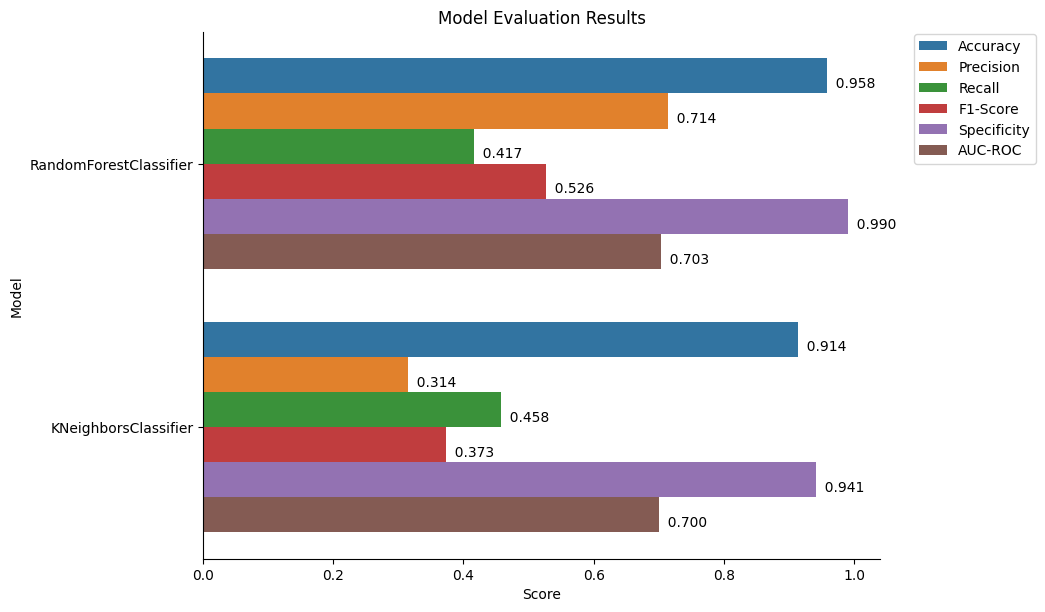

In [34]:
plot_df = pd.melt(TESTING_SCORES, id_vars=["Model"])
plot_df.rename({"variable": "Metric", "value": "Score"}, axis=1, inplace=True)

# Horizontal bar plot version
PLOT = sns.catplot(x="Score", y="Model", hue="Metric", data=plot_df, kind="bar", orient="h",
                   height=6, aspect=1.5, legend_out=False)

ax = PLOT.axes[0, 0]

# Show scores
for p in ax.patches:
    ax.annotate(f" {p.get_width(): .3f}", (p.get_x() + p.get_width(), (p.get_y() + 0.045) + p.get_height() / 2), ha="left")

plt.title("Model Evaluation Results")
plt.legend(loc=(1.05, 0.75))
plt.show()

## MLP

In [35]:
# Set up ToTensor transform
TRANSFORM = transforms.ToTensor()

# Reindex training and test sets
X_TRAIN_RESET = X_TRAIN_SCALED.reset_index(drop=True)
Y_TRAIN_RESET = Y_TRAIN.reset_index(drop=True)

X_TEST_RESET = X_TEST.reset_index(drop=True)
Y_TEST_RESET = Y_TEST.reset_index(drop=True)

# Merge train/test inputs with labels
#TRAIN_DF = pd.concat([X_TRAIN_RESET, Y_TRAIN_RESET], axis=1)
#TEST_DF = pd.concat([X_TEST_RESET, Y_TEST_RESET], axis=1)
TRAIN_DF = pd.concat([X_TRAIN_RESET, Y_TRAIN_RESET.rename("Diagnosis")], axis=1)
TEST_DF = pd.concat([X_TEST_RESET, Y_TEST_RESET.rename("Diagnosis")], axis=1)

# Merge train and test sets into one DataFrame
WHOLE_DF = pd.concat([TRAIN_DF, TEST_DF], axis=0).reset_index(drop=True)

# Instantiate UTIDataset with full dataset and transform
DATA = UTIDataset(WHOLE_DF, TRANSFORM)

In [36]:
TRAIN_TEST_SPLIT_RATIO = [0.7, 0, 0.3]
TRAIN_SET_TORCH, _, TEST_SET_TORCH = torch.utils.data.random_split(DATA, TRAIN_TEST_SPLIT_RATIO)

In [37]:
torch.manual_seed(42)
np.random.seed(42)

# Set batch size
BATCH_SIZE = 16

# Get length of train set
DATA_SIZE = len(TRAIN_DF)

# Set train/test indices from split ratio
TRAIN_INDICES = list(range(int(DATA_SIZE - (DATA_SIZE * TRAIN_TEST_SPLIT_RATIO[2]))))
TEST_INDICES = list(range(int(DATA_SIZE - (DATA_SIZE * TRAIN_TEST_SPLIT_RATIO[0]))))

# Instantiate SubsetRandomSampler for train/test sets
TRAIN_SAMPLER = SubsetRandomSampler(TRAIN_INDICES)
TEST_SAMPLER = SubsetRandomSampler(TEST_INDICES)

# Instantiate DataLoaders for train/test sets
TRAIN_LOADER = DataLoader(TRAIN_SET_TORCH, batch_size=BATCH_SIZE, sampler=TRAIN_SAMPLER)
TEST_LOADER = DataLoader(TEST_SET_TORCH, batch_size=BATCH_SIZE, sampler=TEST_SAMPLER)

In [66]:
import torch.nn.functional as F

EPOCHS = 47
LEARNING_RATE = 0.0024463663749896684

# Instantiate ClassifierNN model
NN_MODEL = ClassifierNN(activation_function=F.relu)

# Set Adam optimizer with best LR
OPTIMIZER = optim.Adam(NN_MODEL.parameters(), lr=LEARNING_RATE)

# Set loss = CrossEntropyLoss
CRITERION = nn.CrossEntropyLoss()

In [67]:
# Select device based on CUDA support
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model to device
NN_MODEL = NN_MODEL.to(DEVICE)

# Enable training mode
NN_MODEL.train()

# Iterate over epochs
for epoch in tqdm(range(EPOCHS)):
    # Loop through training batches
    for x_train, y_train in TRAIN_LOADER:
        # Transfer data and targets to device
        x_train = x_train.to(DEVICE)
        y_train = y_train.to(DEVICE )

        # Reset gradients
        OPTIMIZER.zero_grad()

        # Run forward pass
        OUTPUTS = NN_MODEL(x_train)

        # Loss = criterion(outputs, labels)
        LOSS = CRITERION(OUTPUTS, y_train.flatten())

        # Run backpropagation
        LOSS.backward()

        # Update weights via Adam optimizer
        OPTIMIZER.step()

100%|██████████| 47/47 [00:26<00:00,  1.77it/s]


In [68]:
# Set up lists to track actual vs predicted labels
true_labels = []
predicted_labels = []

# Switch model to eval mode
NN_MODEL.eval()

# Run inference without gradient computation
with torch.no_grad():
    # Loop through test batches
    for val_X, val_y in TEST_LOADER:
        # Transfer data and targets to device
        val_X = val_X.to(DEVICE)
        val_y = val_y.to(DEVICE)

        # Run forward pass
        OUTPUTS = NN_MODEL(val_X)

        # Get predicted labels
        _, YHAT = torch.max(OUTPUTS.data, 1)

        # Append to true/pred lists
        true_labels.extend([arr.flatten()[0] for arr in val_y.cpu().numpy()])
        predicted_labels.extend(YHAT.cpu().numpy())

# Evaluation Metrics
MLP_ACCURACY = accuracy_score(true_labels, predicted_labels)
MLP_F1 = f1_score(true_labels, predicted_labels)
MLP_RECALL = recall_score(true_labels, predicted_labels)
MLP_PRECISION = precision_score(true_labels, predicted_labels)

# Confusion matrix, Specificity, & ROC AUC
MLP_TN, MLP_FP, _, _ = confusion_matrix(true_labels, predicted_labels).ravel()
MLP_SPECIFICITY = MLP_TN / (MLP_TN + MLP_FP)
MLP_ROC_AUC = roc_auc_score(true_labels, predicted_labels)

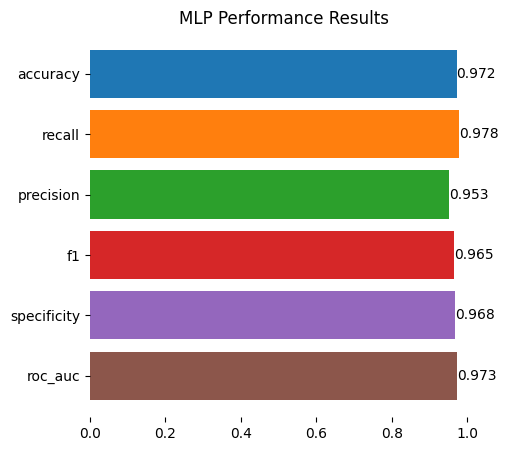

In [69]:
# Horizontal bar plot version
_, axs = plt.subplots(figsize=(5, 5))

# Performance Metrics
bar_graph = axs.barh(["accuracy", "recall", "precision", "f1", "specificity", "roc_auc"],
                    [MLP_ACCURACY, MLP_RECALL, MLP_PRECISION, MLP_F1, MLP_SPECIFICITY, MLP_ROC_AUC],
                    color=sns.color_palette())

CONTAINER = axs.containers[0]
axs.bar_label(bar_graph, labels=[f"{x:,.3f}" for x in CONTAINER.datavalues])

for s in ["top", "bottom", "left", "right"]:
    axs.spines[s].set_visible(False)

axs.invert_yaxis()

plt.title("MLP Performance Results")
plt.show()

In [70]:
MLP_EVAL_SCORES = pd.DataFrame([["MLP", MLP_ACCURACY, MLP_RECALL, MLP_PRECISION, MLP_F1, MLP_SPECIFICITY, MLP_ROC_AUC]], columns=TESTING_SCORES.columns)
pd.concat([TESTING_SCORES, MLP_EVAL_SCORES], ignore_index=True)

,Model,Accuracy,Precision,Recall,F1-Score,Specificity,AUC-ROC
0,RandomForestClassifier,0.958237,0.714286,0.416667,0.526316,0.990172,0.703419
1,KNeighborsClassifier,0.914153,0.314286,0.458333,0.372881,0.941032,0.699683
2,MLP,0.971831,0.977876,0.952586,0.965066,0.967836,0.972856


The evaluation results demonstrate that only the Multi-Layer Perceptron (MLP) model consistently met and exceeded the project’s minimum requirements of 85% accuracy and 85% precision. The Random Forest Classifier achieved a strong accuracy of 95.82%, but its precision of 71.43% fell short of the required threshold. While this model was excellent at correctly identifying negative cases (specificity of 99.02%), its low recall of 41.67% indicates that it missed a substantial number of true positive cases, limiting its clinical utility.

The K-Nearest Neighbors (KNN) Classifier performed even less favorably, with an accuracy of 91.42% but a precision of only 31.43%, well below the project’s minimum requirement. This poor precision, combined with a modest recall of 45.83% and a low F1-score of 37.29%, suggests that KNN produced many false positives and lacked robustness in distinguishing between classes.

In contrast, the MLP model provided the most balanced and reliable performance. With an accuracy of 97.18% and a precision of 97.79%, it comfortably satisfied the project’s minimum criteria. Moreover, its recall of 95.26% indicates strong sensitivity to positive cases, minimizing false negatives—a critical factor in UTI diagnosis. This balance between precision and recall resulted in an excellent F1-score of 96.51%. The MLP also maintained high specificity (96.78%) and achieved the highest AUC-ROC score of 0.97, reflecting outstanding discriminative ability. Overall, the MLP model stands out as the most suitable choice for this project, as it not only meets but surpasses the required thresholds while offering robust and clinically relevant performance.

# Model Interpretation

## Random Forest

In [43]:
RF_MODEL = MODEL_CONTAINER["RandomForestClassifier"]

### Feature Importance

In [44]:
def plot_feature_importances(model, title):
    n_features = X_TRAIN_SCALED.shape[1]

    # Extract feature importances with corresponding column names
    results = {column:value for value, column in zip(model.feature_importances_, X_TRAIN_SCALED.columns)}

    # Sort feature importances
    sorted_results = {column:value for column, value in sorted(results.items(), key = lambda x: x[1])}

    plt.barh(range(len(sorted_results.values())), sorted_results.values(), align='center', color="lightblue")
    plt.yticks(range(len(sorted_results.values())), sorted_results.keys())

    plt.title(f"{title}: Feature Importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    plt.show()

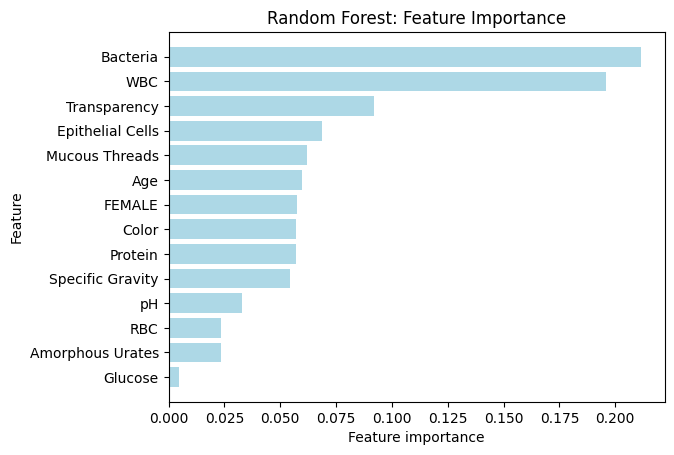

In [45]:
plot_feature_importances(RF_MODEL, "Random Forest")

The plot illustrates the relative contribution of each feature to the Random Forest model’s prediction of UTI diagnosis. Feature importance values on the x-axis quantify how much each variable enhances the model’s decision-making, with higher values indicating greater influence. At the top of the chart, bacterial presence emerges as the most critical predictor, closely followed by white blood cell count (WBC)—both consistent with their roles as primary indicators of infection.

Transparency, epithelial cells, and mucous threads also rank highly, suggesting that cloudiness and cellular shedding in urine are informative markers of infection status. Age and FEMALE appear in the mid-tier, indicating that demographic factors contribute meaningfully but are less influential than direct biological indicators. Color and protein offer modest predictive value, while features such as specific gravity, pH, RBC, amorphous urates, and glucose show minimal impact on the model’s predictions.

These results reinforce that the Random Forest model prioritizes direct signs of infection, particularly bacterial load and immune response markers, while demographic and chemical features serve a supplementary role. This hierarchy of importance aligns well with clinical expectations and enhances the model’s interpretability for medical decision-making.

## KNN

In [46]:
KNN_MODEL = MODEL_CONTAINER["KNeighborsClassifier"]

### Feature Importance

In [47]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    KNN_MODEL,
    X_test_val,
    y_test_val,
    scoring='f1',
    n_repeats=20,
    random_state=42
)

importance_df = pd.DataFrame({
    "feature": X_train_val.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values(by="importance_mean", ascending=False)

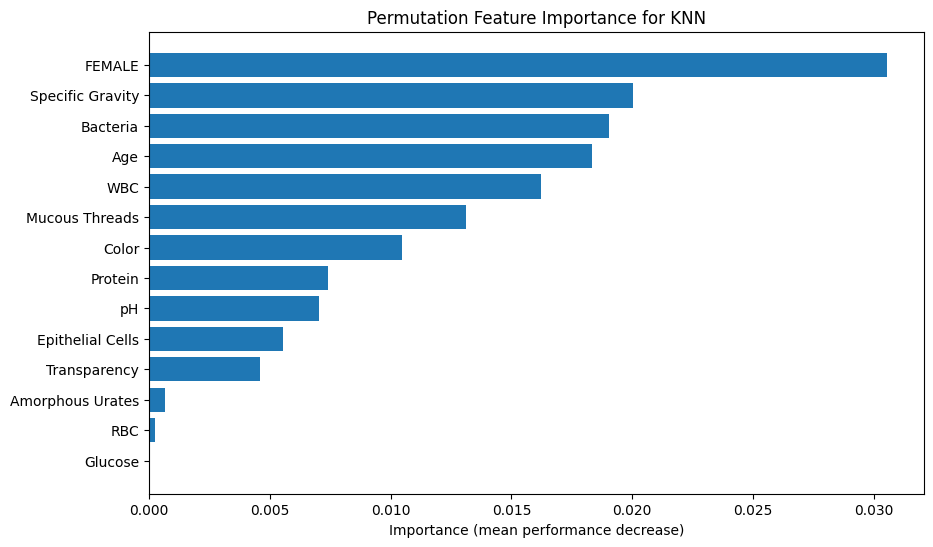

In [48]:
plt.figure(figsize=(10,6))
plt.barh(importance_df["feature"], importance_df["importance_mean"])
plt.gca().invert_yaxis()
plt.xlabel("Importance (mean performance decrease)")
plt.title("Permutation Feature Importance for KNN")
plt.show()

The permutation feature importance chart for the K-Nearest Neighbors (KNN) model highlights which input variables most influenced its predictive performance for UTI classification. The top-ranked feature, FEMALE, produced the largest drop in model performance when permuted, suggesting that patient sex was the most critical variable for KNN’s decision-making. Specific Gravity, Bacteria, Age, and WBC followed with moderate importance, indicating that demographic factors, microbial presence, and urine concentration played notable roles in shaping predictions.

Interestingly, several features traditionally associated with UTI diagnosis such as WBC, Color, and Epithelial Cells ranked lower in importance than expected, which may reflect the model’s limited capacity to capture complex clinical patterns. Features like Protein, pH, Transparency, and Glucose contributed minimally, with Glucose showing the least impact overall.

This distribution of feature importance helps explain the KNN model’s weak performance in earlier evaluation metrics. Despite achieving a reasonable accuracy of 91.42%, its precision was only 31.43%, far below the project’s minimum requirement of 85%. The model’s low precision and modest recall (45.83%) suggest that it struggled to distinguish true positives from false positives, likely due to its reliance on features that lack strong discriminative power for UTI classification. The permutation results reinforce this interpretation, showing that KNN prioritized variables that may not be sufficiently specific or sensitive for clinical decision-making. Consequently, the model’s overall reliability and utility were limited compared to more robust alternatives such as the MLP discussed in the next section.

## MLP

### Model Interpretability

In [71]:
import shap
shap.initjs()

In [72]:
# Cast FEMALE booleans to integers for train
X_TRAIN_SCALED["FEMALE"] = [1 if bool_ else 0 for bool_ in X_TRAIN_SCALED["FEMALE"]]

# Cast FEMALE booleans to integers for test
X_TEST["FEMALE"] = [1 if bool_ else 0 for bool_ in X_TEST["FEMALE"]]

In [73]:
INPUT_DATA = X_TEST.values.astype('float32')
INPUT_TENSOR = torch.tensor(INPUT_DATA)

In [74]:
NN_MODEL = NN_MODEL.to("cpu")
DEEP_EXPLAINER = shap.DeepExplainer(NN_MODEL, INPUT_TENSOR)

In [75]:
MLP_SHAP_VALUES = DEEP_EXPLAINER.shap_values(INPUT_TENSOR, check_additivity=False)

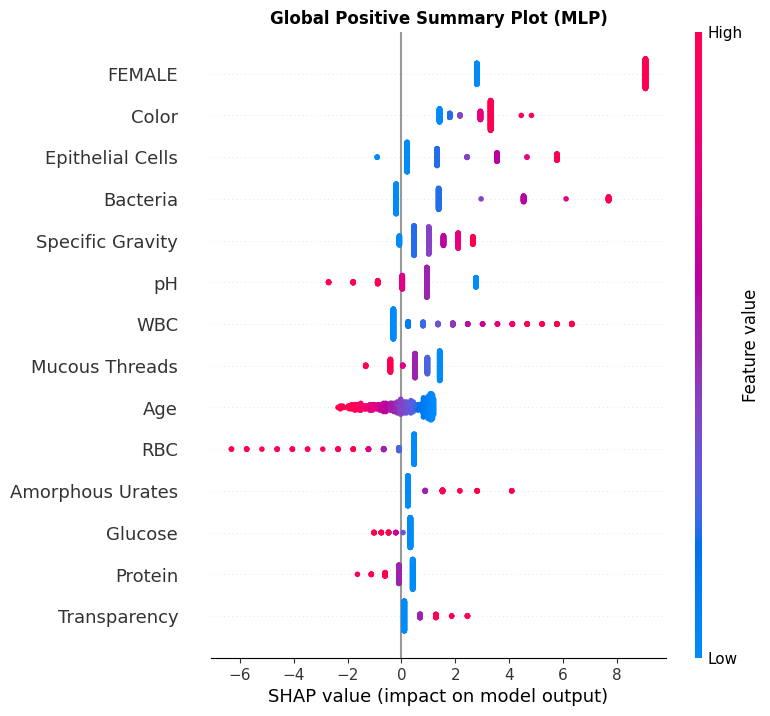

In [76]:
shap.summary_plot(MLP_SHAP_VALUES[1], X_TEST, show=False)
plt.title("Global Positive Summary Plot (MLP)", fontdict={"fontweight":"bold"})
plt.show()

The SHAP summary plot for the MLP model provides a comprehensive view of how individual features influence predictions of positive urinary tract infection (UTI) diagnoses. SHAP values on the x-axis quantify each feature’s contribution to the model output, with higher values indicating stronger influence toward a positive classification. The color gradient from blue to red reflects low to high feature values, enabling insight into how specific value ranges affect predictions.

Among the most impactful features, FEMALE ranks highest, consistent with the epidemiological trend that UTIs are more prevalent in women. Urine color also shows strong influence, suggesting that abnormal coloration may signal infection. Epithelial cells, bacteria, and specific gravity follow closely, aligning with clinical expectations that cellular shedding, microbial presence, and urine concentration are key indicators. Elevated white blood cell (WBC) counts further reinforce the model’s alignment with biological markers of infection.

Mid-level contributors such as pH, mucous threads, RBC, and protein offer diagnostic nuance, often interacting with stronger predictors to refine classification. Lower-impact features—including amorphous urates, glucose, transparency, and age—exert minimal individual influence but may still enhance performance when considered collectively. The vertical spread of SHAP values within each feature reflects heterogeneity in their impact across samples, while the clustering of high-value (red) points on the right confirms that elevated feature levels consistently push the model toward positive UTI predictions.

# Save Best Model (MLP)

In [77]:
import torch
import pickle

# Save PyTorch model
MODEL_PATH = 'uti_mlp_model.pth'
torch.save({
    'model_state_dict': NN_MODEL.state_dict(),
    'input_size': 14,
    'best_params': {
        'activation': 'relu',
        'learning_rate': LEARNING_RATE,
        'epochs': EPOCHS
    }
}, MODEL_PATH)

# Save scaler
SCALER_PATH = 'scaler.pkl'
with open(SCALER_PATH, 'wb') as f:
    pickle.dump(TRAIN_SCALER, f)

print(f"Model saved to {MODEL_PATH}")
print(f"Scaler saved to {SCALER_PATH}")

Model saved to uti_mlp_model.pth
Scaler saved to scaler.pkl
